# 顔認証システムによる写真の中の人物の判定

# インストール

In [2]:
%pip install ultralytics dill opencv-python matplotlib facenet-pytorch mtcnn
# 必要なライブラリを一度にインストールします（ノートブック内で実行）。


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# はっきり写っている顔から小さい顔の判定

検出された顔の数: 18 faces


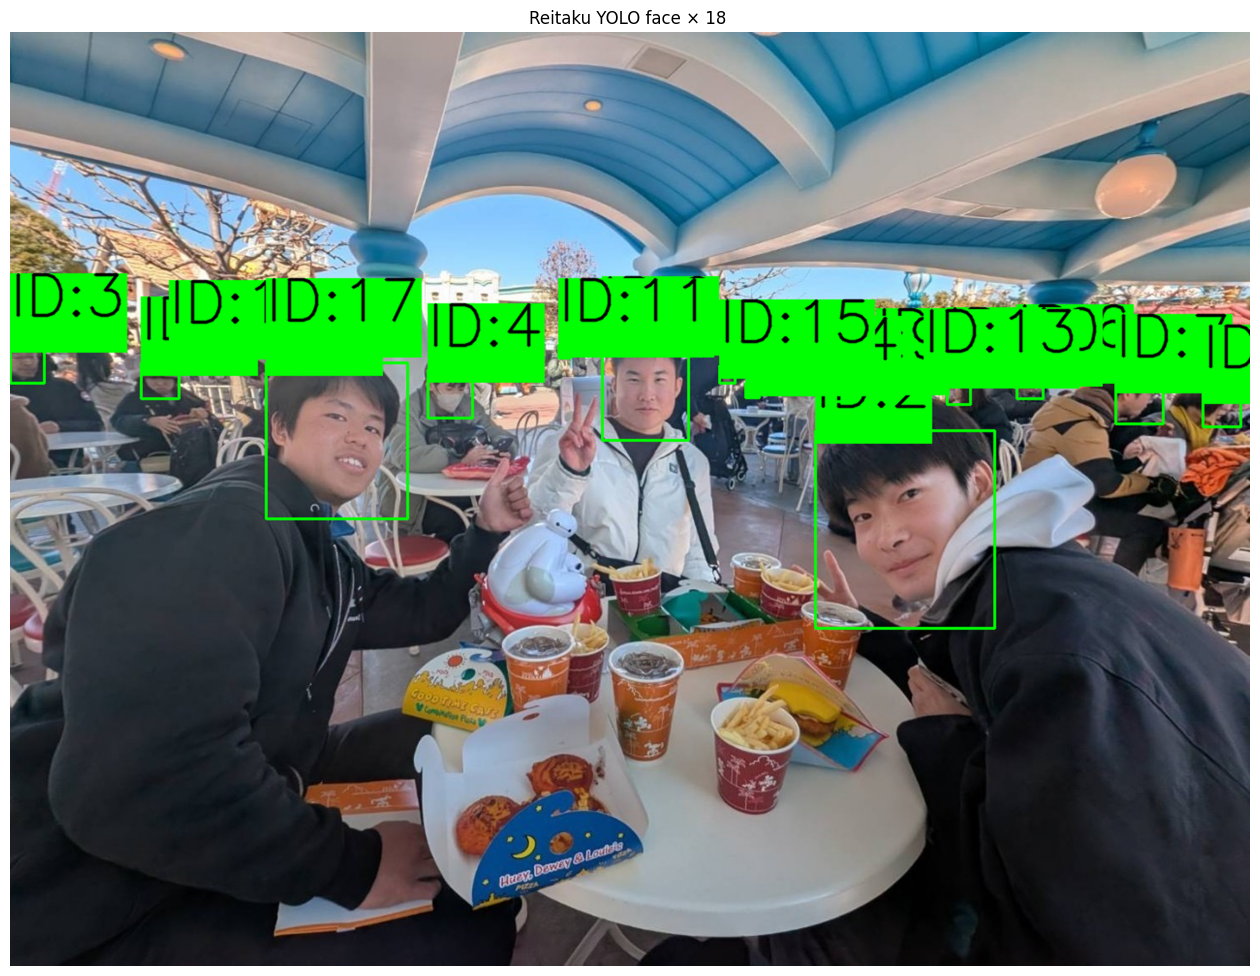

In [9]:
import cv2
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 画像とモデルの準備
image_path = Path("IMG_0997.JPG")
model_path = Path("yolov8m-face.pt")

# YOLO で高解像度推論（imgsz を指定）
model = YOLO(model_path)
result = model.predict(source=str(image_path), conf=0.25, verbose=False, imgsz=1280)[0]

# 画像読み込みと基本情報
annotated = cv2.imread(str(image_path))
h_img, w_img = annotated.shape[:2]
color = (0,255,0)
font_scale = 2
thickness = 2

# 検出結果を描画（バッファ付き）
for idx, box in enumerate(result.boxes.xyxy.cpu().numpy()):
    x1,y1,x2,y2 = map(int, box)
    w = x2 - x1; h = y2 - y1
    pad = int(max(w,h) * 0.2)  # バッファ 20%
    x1p = max(0, x1 - pad); y1p = max(0, y1 - pad)
    x2p = min(w_img, x2 + pad); y2p = min(h_img, y2 + pad)
    cv2.rectangle(annotated, (x1p,y1p), (x2p,y2p), color, thickness)
    label = f"ID:{idx}"
    (w_label, h_label), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
    y_label = y1p-6 if y1p-6>h_label else y1p+h_label+6
    cv2.rectangle(annotated, (x1p, y_label-h_label-baseline), (x1p+w_label, y_label+baseline), color, -1)
    cv2.putText(annotated, label, (x1p, y_label-baseline), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0,0,0), thickness, cv2.LINE_AA)

# 高解像度で保存（アップスケールして保存）
output_path = Path("reitaku_yolo_faces.jpg")
annot_up = cv2.resize(annotated, (w_img*2, h_img*2), interpolation=cv2.INTER_CUBIC)
cv2.imwrite(str(output_path), annot_up)
print(f"検出された顔の数: {len(result.boxes)} faces")
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(annot_up, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Reitaku YOLO face × {len(result.boxes)} ')
plt.show()

# 後ろを向いている人物や横顔などの判定

検出された顔の数: 8 faces


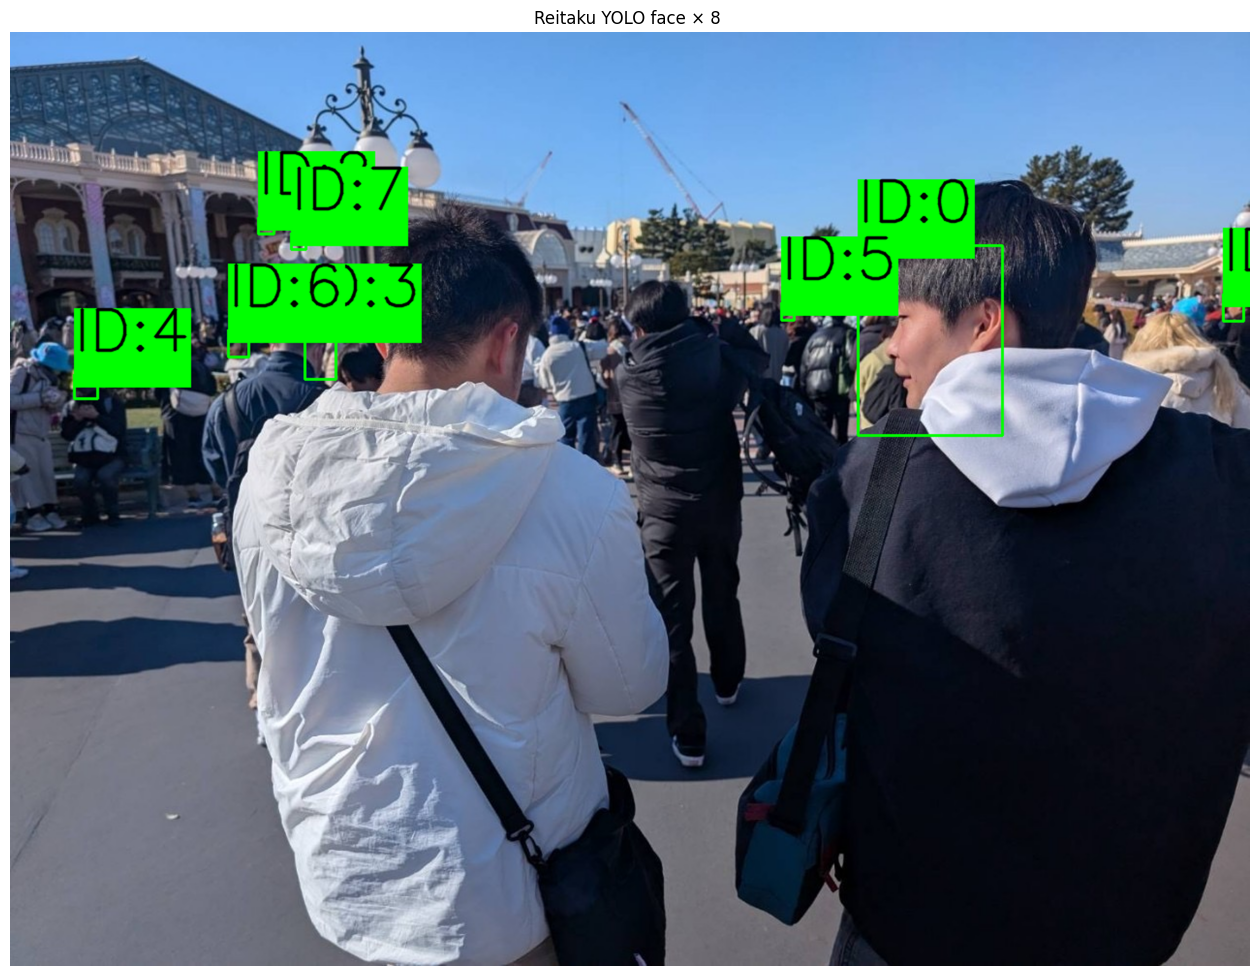

In [10]:
import cv2
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 画像とモデルの準備
image_path = Path("IMG_0998.JPG")
model_path = Path("yolov8m-face.pt")

# YOLO で高解像度推論（imgsz を指定）
model = YOLO(model_path)
result = model.predict(source=str(image_path), conf=0.25, verbose=False, imgsz=1280)[0]

# 画像読み込みと基本情報
annotated = cv2.imread(str(image_path))
h_img, w_img = annotated.shape[:2]
color = (0,255,0)
font_scale = 2
thickness = 2

# 検出結果を描画（バッファ付き）
for idx, box in enumerate(result.boxes.xyxy.cpu().numpy()):
    x1,y1,x2,y2 = map(int, box)
    w = x2 - x1; h = y2 - y1
    pad = int(max(w,h) * 0.2)  # バッファ 20%
    x1p = max(0, x1 - pad); y1p = max(0, y1 - pad)
    x2p = min(w_img, x2 + pad); y2p = min(h_img, y2 + pad)
    cv2.rectangle(annotated, (x1p,y1p), (x2p,y2p), color, thickness)
    label = f"ID:{idx}"
    (w_label, h_label), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
    y_label = y1p-6 if y1p-6>h_label else y1p+h_label+6
    cv2.rectangle(annotated, (x1p, y_label-h_label-baseline), (x1p+w_label, y_label+baseline), color, -1)
    cv2.putText(annotated, label, (x1p, y_label-baseline), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0,0,0), thickness, cv2.LINE_AA)

# 高解像度で保存（アップスケールして保存）
output_path = Path("reitaku_yolo_faces.jpg")
annot_up = cv2.resize(annotated, (w_img*2, h_img*2), interpolation=cv2.INTER_CUBIC)
cv2.imwrite(str(output_path), annot_up)
print(f"検出された顔の数: {len(result.boxes)} faces")
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(annot_up, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Reitaku YOLO face × {len(result.boxes)} ')
plt.show()

# 大人数による判定　（肖像権を考慮してぼかしにしました）

ぼかし画像を保存しました: IMG_7543_blur_faces.jpg 


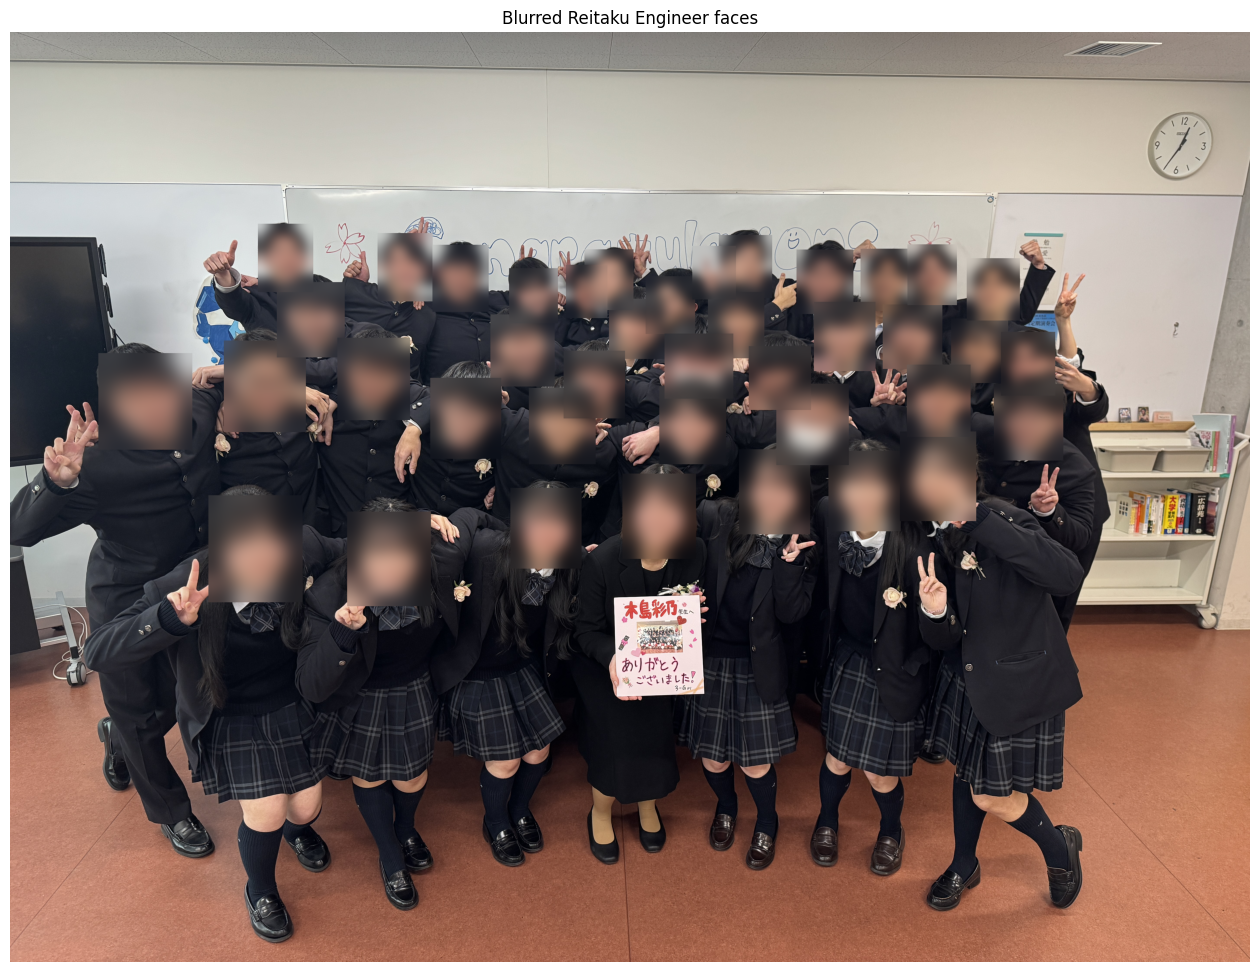

In [15]:
# 顔領域を強くぼかして高解像度で保存（関数化）：blur_faces(image_path) を定義・実行
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

def blur_faces(image_path):
    """
    blur_faces(image_path): YOLO で検出して顔領域を強くぼかす関数。
    引数は image_path のみ（文字列または Path）。
    """
    image_path = Path(image_path)
    model_path = Path('yolov8m-face.pt')
    from ultralytics import YOLO
    model = YOLO(model_path)
    result = model.predict(source=str(image_path), conf=0.25, verbose=False, imgsz=1280)[0]

    # 画像を読み込む
    img = cv2.imread(str(image_path))
    if img is None:
        raise FileNotFoundError(f'Image not found: {image_path}')
    h_img, w_img = img.shape[:2]
    out = img.copy()  # 出力用にコピー

    # 検出された顔ごとに処理
    for box in result.boxes.xyxy.cpu().numpy():
        x1, y1, x2, y2 = map(int, box)
        if x2 <= x1 or y2 <= y1:
            continue  # 異常なボックスはスキップ
        w = x2 - x1
        h = y2 - y1
        pad = int(max(w, h) * 0.2)  # 顔の周囲に20%のバッファを追加
        x1p = max(0, x1 - pad)
        y1p = max(0, y1 - pad)
        x2p = min(w_img, x2 + pad)
        y2p = min(h_img, y2 + pad)
        face = out[y1p:y2p, x1p:x2p]  # 顔領域を切り出し
        if face.size == 0:
            continue  # 領域が空ならスキップ
        # ブラーのカーネルサイズを決定（顔サイズに応じて大きめに設定）
        k = max(5, min(face.shape[0], face.shape[1]) // 2)
        if k % 2 == 0:
            k += 1  # カーネルサイズは奇数にする必要あり
        # 2回ガウシアンブラーをかけて強くぼかす
        face_blur = cv2.GaussianBlur(face, (k, k), 0)
        face_blur = cv2.GaussianBlur(face_blur, (k, k), 0)
        out[y1p:y2p, x1p:x2p] = face_blur  # ぼかした顔を元画像に貼り付け

    # 画像全体を2倍にアップスケールして高解像度で保存
    up = cv2.resize(out, (w_img*2, h_img*2), interpolation=cv2.INTER_CUBIC)
    output_path = image_path.with_name(image_path.stem + '_blur_faces.jpg')
    cv2.imwrite(str(output_path), up)
    print(f'ぼかし画像を保存しました: {output_path} ')

    # 結果を表示
    plt.figure(figsize=(16,16))
    plt.imshow(cv2.cvtColor(up, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Blurred Reitaku Engineer faces')
    plt.show()

# 関数を実行（reitaku.jpg を引数として渡す）
blur_faces('IMG_7543.JPG')

# 顔が少しでも判定できれば遠い人物や小さい顔の判定もできることがわかりました。また、大人数でも全員の顔を検出できた。一方で、後ろ向きなど顔が捉えきれていない人物は判定できないことがわかりました。